In [57]:
import numpy as np
import pandas as pd
from astropy.table import Table
import cPickle

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
table1 = pd.read_csv("../GZ2ASSETS_NAIR_MORPH_MAIN.csv")
table2 = Table.read("gz2sample.fits")

In [59]:
filename = "../S_PLPD5_p5_ff_norand/GZ2_sup_PLPD5_p5_flipfeature2b_metadata.pickle"
with open(filename) as F:
    table3 = cPickle.load(F)

ImportError: No module named swap.storage

In [10]:
table2 = table2.to_pandas()

In [56]:
print table3

            id                name  total_classifications  \
0            1  587722981736120347                    NaN   
1            2  587722981736579107                   43.0   
2            3  587722981741363294                   52.0   
3            4  587722981741363323                   30.0   
4            5  587722981741559888                   53.0   
5            6  587722981741625481                   37.0   
6            7  587722981741625484                   45.0   
7            8  587722981741625520                   43.0   
8            9  587722981741625545                   40.0   
9           10  587722981741691055                   44.0   
10          11  587722981741756545                   40.0   
11          12  587722981741756579                   44.0   
12          13  587722981741822057                   42.0   
13          14  587722981741887560                   39.0   
14          15  587722981742018657                   45.0   
15          16  58772298

In [14]:
table1['OBJID'] = table1['name'].copy()

In [15]:
table = pd.merge(table1, table2, on='OBJID')

In [26]:
print np.min(table['REDSHIFT']), np.max(table['REDSHIFT'])

0.000504372 0.249832


(array([ 20764.,  39756.,  46793.,  52847.,  33145.,  25103.,  15840.,
             0.,      0.,      0.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

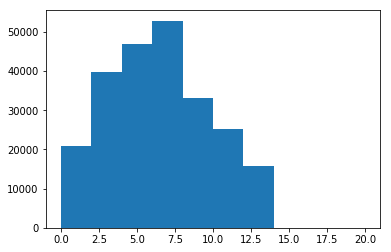

In [34]:
plt.hist(table['REDSHIFT_SIMPLE_BIN'], range=(0, 20))

In [48]:
zbins = np.unique(table['REDSHIFT_SIMPLE_BIN'])[2:-1]
print zbins

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [50]:
sample = [np.random.choice(table["OBJID"][table['REDSHIFT_SIMPLE_BIN'] == n]) for n in zbins]

In [51]:
sample

[587741603099770951,
 587738195584090228,
 587733399179362335,
 587731186187829751,
 587731870169497762,
 587739609160548465,
 587741421641072811,
 587742864746545281,
 587730846355292691,
 587732592257073257,
 588297864190623826,
 587731186188288459,
 587729753280545079,
 587729226612473932]